<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***Classificação do perfil de estudandes de TI***
---

*Siga esse template para entrega do seu projeto. O código deste notebook precisa ser 100% executável.*

In [34]:
#@title Identificação do Grupo

#@markdown Turma **7N**

#@markdown Integrantes do Grupo (*informe \<TIA\>,\<nome\>*)
Aluno1 = '31974430 - Matheus Pinsdorf' #@param {type:"string"} 
Aluno2 = '31906591 - Leandro Yasuzawa' #@param {type:"string"}
Aluno3 = '31942822 - Pedro Simoes Pinsdorf ' #@param {type:"string"}
Aluno4 = '31750737 - Bruno Fidalgo ' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Apresentação**

# Problema

*Optamos pela Opção 2 do trabalho então estamos trabalhando com classificação multiclasse de um problema que envolve TI, no nosso caso escolhemos um dataset que visa classificar o perfil de um estudande de TI com base no tempo que ele gasta estudando certas materias e o nivel de profundidade do seu estudo classificando-os em (begginer_front_end,begginer_back_end,begginer_data_science,advanced_data_science,advanced_front_end,advanced_back_end)*



# Referencial Teórico



Base de Dados : (https://www.kaggle.com/datasets/scarecrow2020/tech-students-profile-prediction/code)


KNN : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html;

Arvore de Decisão : https://scikit-learn.org/stable/modules/tree.html;


Algoritimos supervisionados: https://scikit-learn.org/stable/supervised_learning.html.


# Metodologia 

*Apresente e discuta a abordagem de solução empregada. Discuta os dados empregados, tratamento efetuados, variáveis preditoras e objetivo, técnicas empregadas.*

Escolhemos um dataset que visa classificar o perfil de estudantes de TI, a variavel que desejamos classificar é a 'PROFILE' utilizando todas as outras variaveis do dataset como variaveis preditoras (exeto variaveis identificadoras), alem disso precisamos descsartar linhas com dados nulos e ajustar a variavel objetivo de string para inteiro.


Utilizamos 2 abordagens KNN (K vizinhos mais proximos) e Arvore de Desição.



# Resultados

Aplicamos 2 modelos, 2 algotimos de Classificação diferentes no nosso conjunto de dados , Arvore de Decição x KNN e tivemos resultados muito parecidos , de um lado tivemos uma taxa de Acertividade de 77% de acerto (knn) vs 76,9 % de acerto da (arvore de decisão) um empate tecnico. em ambos os casos utilizamos uma base de teste de 30% do volume total dos dados. o F2 Score tambem se mostrou semelhante nas nossas execuções tambem um empate tecnico de 0,77.


# **Implementação**

Imports

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

# Base de Dados 

*Descreva aqui os dados utilizados, discuta eventuais transformações e/ou seleções dos dados e preparações nos dados.* 




In [24]:
# Base de dados Carregada localizada no keagle e armazenada no nosso github particular para facil acesso 
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/matpinsdorf/Datasets/main/dataset-tortuga.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20000 non-null  int64  
 1   NAME                              20000 non-null  object 
 2   USER_ID                           20000 non-null  int64  
 3   HOURS_DATASCIENCE                 19986 non-null  float64
 4   HOURS_BACKEND                     19947 non-null  float64
 5   HOURS_FRONTEND                    19984 non-null  float64
 6   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 7   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 8   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 9   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 10  NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 11  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 12  AVG_

## **Modelo 1**

*No nosso primeiro modelo usamos o Algoritimo KNN (K-vizinhos-mais-proximos)*


### **Modelo 1:** Preparação dos Dados


In [25]:
#Removendo Colunas Identificadoras
df.drop(columns = ['Unnamed: 0','NAME','USER_ID'], inplace = True)
df = df.dropna()

#Ajustando Variavel Decidivel (String -> int)
df['PROFILE'].replace(['beginner_data_science','beginner_front_end','beginner_backend'
                       ,'advanced_front_end','advanced_data_science','advanced_backend'],
                        [0,1,2,3,4,5], inplace=True)
    

df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
11,39.0,52.0,34.0,2.0,4.0,4.0,1.0,5.0,5.0,69.0,65.0,73.0,2
12,28.0,44.0,16.0,3.0,2.0,5.0,0.0,4.0,4.0,41.0,40.0,76.0,0
13,74.0,36.0,41.0,2.0,5.0,2.0,3.0,4.0,2.0,52.0,77.0,66.0,3
14,69.0,40.0,18.0,4.0,3.0,5.0,4.0,7.0,6.0,40.0,82.0,78.0,4
15,46.0,102.0,44.0,7.0,9.0,3.0,5.0,3.0,3.0,69.0,94.0,50.0,3


### **Modelo 1:** Modelo


In [26]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

# Preparando os dados
x = df.drop(columns = ['PROFILE'])     # X = entrada, variáveis independentes
y = df.PROFILE                                         # y = saída, variável dependente 

#Gerando massa de Teste aleatoriamente
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1000)

# Definindo ou declarando o modelo 
n_neighbors = 3
clf = neighbors.KNeighborsClassifier(n_neighbors)

# Aprendizado (construindo ou executando o modelo)
clf.fit(X_train, y_train)                  # Emprega o conjunto de treinamento 

# Fazendo a predição
type_pred = clf.predict(X_test)

### **Modelo 1:** Resultados


In [27]:
a = pd.DataFrame(y_pred)
b = pd.DataFrame(np.array(y_test))
c = a == b
d = pd.concat([a,b,c],axis=1)

d.columns=['Real','Predicted','Equal?']
# print(d)
print(d[d['Equal?'] == False])



      Real  Predicted  Equal?
7        5          2   False
9        5          2   False
15       1          0   False
37       0          1   False
41       0          2   False
...    ...        ...     ...
5763     1          5   False
5770     1          0   False
5774     2          3   False
5778     5          0   False
5792     2          1   False

[1317 rows x 3 columns]


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
    
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[[758  29  64  34  41  40]
 [ 32 774  41  56  39  20]
 [ 57  45 676  41  52  55]
 [ 34  49  40 813  42  25]
 [ 44  46  54  46 696  74]
 [ 29  30  61  22  75 765]]
0.7728918779099845
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       966
           1       0.80      0.80      0.80       962
           2       0.72      0.73      0.73       926
           3       0.80      0.81      0.81      1003
           4       0.74      0.72      0.73       960
           5       0.78      0.78      0.78       982

    accuracy                           0.77      5799
   macro avg       0.77      0.77      0.77      5799
weighted avg       0.77      0.77      0.77      5799



## **Modelo 2**

*Utilizamos o Algoritimo de Arvore de decisão*


### **Modelo 2:** Preparação dos Dados


In [29]:
# seu código
# Base de dados Carregada localizada no keagle e armazenada no nosso github particular para facil acesso 
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/matpinsdorf/Datasets/main/dataset-tortuga.csv')
df.info()

#Removendo Colunas Identificadoras
df.drop(columns = ['Unnamed: 0','NAME','USER_ID'], inplace = True)
df = df.dropna()

#Ajustando Variavel Decidivel (String -> int)
df['PROFILE'].replace(['beginner_data_science','beginner_front_end','beginner_backend'
                       ,'advanced_front_end','advanced_data_science','advanced_backend'],
                        [0,1,2,3,4,5], inplace=True)
    

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20000 non-null  int64  
 1   NAME                              20000 non-null  object 
 2   USER_ID                           20000 non-null  int64  
 3   HOURS_DATASCIENCE                 19986 non-null  float64
 4   HOURS_BACKEND                     19947 non-null  float64
 5   HOURS_FRONTEND                    19984 non-null  float64
 6   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 7   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 8   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 9   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 10  NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 11  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 12  AVG_

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
11,39.0,52.0,34.0,2.0,4.0,4.0,1.0,5.0,5.0,69.0,65.0,73.0,2
12,28.0,44.0,16.0,3.0,2.0,5.0,0.0,4.0,4.0,41.0,40.0,76.0,0
13,74.0,36.0,41.0,2.0,5.0,2.0,3.0,4.0,2.0,52.0,77.0,66.0,3
14,69.0,40.0,18.0,4.0,3.0,5.0,4.0,7.0,6.0,40.0,82.0,78.0,4
15,46.0,102.0,44.0,7.0,9.0,3.0,5.0,3.0,3.0,69.0,94.0,50.0,3


### **Modelo 2:** Modelo


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

# Prepara os dados para o Treinamento
# Preparando os dados
x = df.drop(columns = ['PROFILE'])     
y = df.PROFILE                                         
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1000)

# Declara o Modelo
clf = DecisionTreeClassifier()

# Treinamento (Treina o Modelo) 
clf.fit(X_train, y_train)                             

# Predição (Emprega o Modelo) 
y_pred = clf.predict(X_test)                          

### **Modelo 2:** Resultados


In [31]:
a = pd.DataFrame(y_pred)
b = pd.DataFrame(np.array(y_test))
c = a == b
d = pd.concat([a,b,c],axis=1)

d.columns=['Real','Predicted','Equal?']
# print(d)
print(d[d['Equal?'] == False])

      Real  Predicted  Equal?
7        5          2   False
9        5          2   False
15       1          0   False
37       0          1   False
43       4          0   False
...    ...        ...     ...
5774     2          3   False
5778     5          0   False
5781     2          4   False
5787     3          2   False
5792     2          1   False

[1337 rows x 3 columns]


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
    
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print(classification_report(y_test, y_pred))

[[751  27  54  41  43  50]
 [ 35 782  36  54  34  21]
 [ 54  36 670  43  54  69]
 [ 35  49  40 796  54  29]
 [ 44  42  54  44 703  73]
 [ 34  25  68  21  74 760]]
0.7694430074150715
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       966
           1       0.81      0.81      0.81       962
           2       0.73      0.72      0.73       926
           3       0.80      0.79      0.80      1003
           4       0.73      0.73      0.73       960
           5       0.76      0.77      0.77       982

    accuracy                           0.77      5799
   macro avg       0.77      0.77      0.77      5799
weighted avg       0.77      0.77      0.77      5799



[Text(0.5631631361829774, 0.9782608695652174, 'X[4] <= 4.5\ngini = 0.833\nsamples = 13529\nvalue = [2249, 2247, 2221, 2241, 2290, 2281]'),
 Text(0.29607343685513826, 0.9347826086956522, 'X[5] <= 3.5\ngini = 0.819\nsamples = 9001\nvalue = [1783, 880, 1632, 891, 1988, 1827]'),
 Text(0.0932852158997111, 0.8913043478260869, 'X[11] <= 60.5\ngini = 0.804\nsamples = 3476\nvalue = [478, 681, 1052, 524, 268, 473]'),
 Text(0.03241139599669831, 0.8478260869565217, 'X[9] <= 62.5\ngini = 0.676\nsamples = 1026\nvalue = [129, 528, 66, 186, 66, 51]'),
 Text(0.015187783739166323, 0.8043478260869565, 'X[6] <= 3.5\ngini = 0.718\nsamples = 365\nvalue = [91, 38, 15, 160, 40, 21]'),
 Text(0.008281744394001925, 0.7608695652173914, 'X[10] <= 54.5\ngini = 0.487\nsamples = 221\nvalue = [12, 29, 12, 154, 14, 0]'),
 Text(0.00566790480121062, 0.717391304347826, 'X[1] <= 57.5\ngini = 0.73\nsamples = 62\nvalue = [9, 27, 8, 8, 10, 0]'),
 Text(0.0034117485211170727, 0.6739130434782609, 'X[0] <= 47.0\ngini = 0.664\nsam

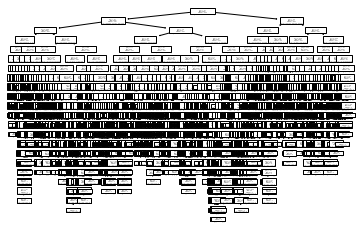

In [12]:
from sklearn import tree
tree.plot_tree(clf)

# **Conclusão** 

Aplicamos 2 modelos, 2 algotimos de Classificação diferentes no nosso conjunto de dados , Arvore de Decição x KNN e tivemos resultados muito parecidos , de um lado tivemos uma taxa de Acertividade de 77% de acerto (knn) vs 76,9 % de acerto da (arvore de decisão) um empate tecnico. em ambos os casos utilizamos uma base de teste de 30% do volume total dos dados. o F2 Score tambem se mostrou semelhante nas nossas execuções tambem um empate tecnico de 0,77.


# **Referências** 

Base de Dados : (https://www.kaggle.com/datasets/scarecrow2020/tech-students-profile-prediction/code)


KNN : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html;

Arvore de Decisão : https://scikit-learn.org/stable/modules/tree.html;


Algoritimos supervisionados: https://scikit-learn.org/stable/supervised_learning.html.


---

In [ ]:
#@title Avaliação
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown Projeto cumpre todos os itens pedidos. 
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As seleções de dados e eventos para análise são relevantes e justificados. 
Tecnicas = 6 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de empregadas são adequadas e corretamente aplicadas.
Apresentacao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva.
Analise = 8 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As premissas de análise se justificam e a analise é correta. 
Conclusao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados








In [35]:
#@markdown ### Nota Final
nota = Completo + Relevancia + Tecnicas + Apresentacao + Analise + Conclusao 

nota = nota / 6 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
alunos

NameError: ignored